Solutions available:
https://uu-sml.github.io/course-apml-public/exercises/solutions/Session03.html

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as spio

# Bayesian linear regression

In this exercise session we consider the supervised regression problem of finding a function $f(x)$ that describes the relationship between a scalar input $x$ and a scalar output $y$:

$$
y = f(x) + \epsilon, \qquad \epsilon \sim \mathcal{N}(0, \beta^{-1}).
$$

We model this with a Bayesian linear regression model

$$
f(x) = \boldsymbol{\phi}(x)^{\mathsf{T}} \mathbf{w}, \qquad \mathbf{w} \sim \mathcal{N}(\boldsymbol{\mu}_0, \mathbf{S}_0),
$$

where $\boldsymbol{\phi}(x)$ is a vector of the input features.
Note that we used the notation $\mathbf{x}$ for the input features in the lecture.
We changed this notation to $\boldsymbol{\phi}(x)$ here in order to not mix it up with the scalar input $x$.

The Bayesian linear regression model is then given by

$$
\begin{aligned}
p(\mathbf{y} \,|\, \mathbf{w}) &= \mathcal{N}(\mathbf{y}; \boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}_N) \qquad && \text{(likelihood)}, \\
p(\mathbf{w}) &= \mathcal{N}(\mathbf{w}; \mathbf{m}_0, \mathbf{S}_0) \qquad && \text{(prior)},
\end{aligned}
$$

where

$$
\boldsymbol{\Phi} = \begin{bmatrix} \boldsymbol{\phi}(x_1)^{\mathsf{T}} \\ \vdots \\ \boldsymbol{\phi}(x_N)^{\mathsf{T}} \end{bmatrix}
\qquad \text{and} \qquad
\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix}.
$$

Given a set of training data of inputs and outputs $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^N$, we are interested in finding the posterior of the weights $p(\mathbf{w} \,|\, \mathbf{y})$ and also the predictive distribution $p(f(x_{\star}) \,|\, \mathbf{y})$ of unseen input $x_{\star}$.
For further information about the Bayesian linear regression model see Lecture 3 and/or Christopher Bishop's book ["Pattern recognition and machine learning"](https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/).


## Exercise 3.1: Understanding the code

Download the files <a href="https://uni-tuebingen.de/fileadmin/Uni_Tuebingen/Fakultaeten/MatNat/Fachbereiche/Informatik/Lehrstuehle/MethMaschLern/Probabilistic_ML/Notebook_Vorlesung_7___9/lindata.mat" download="lindata.mat">`lindata.mat`</a> and <a href="https://uni-tuebingen.de/fileadmin/Uni_Tuebingen/Fakultaeten/MatNat/Fachbereiche/Informatik/Lehrstuehle/MethMaschLern/Probabilistic_ML/Notebook_Vorlesung_7___9/nlindata.mat" download="nlindata.mat">`nlindata.mat`</a> and save them to the folder of this notebook.
These datasets are borrowed from Philipp Hennig's course ["Probabilistic machine learning"](https://uni-tuebingen.de/en/180804), given at the University of Tübingen.

The following code cell loads inputs, outputs, and precision parameter from `lindata.mat` and plots the feature vector

$$
\boldsymbol{\phi}(x)^{\mathsf{T}} = [1, x].
$$

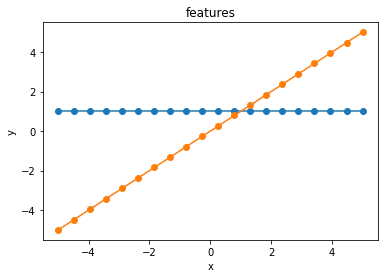

In [44]:
# Load data from disk
# File should be in the same folder as the Jupyter notebook,
# otherwise you have to adjust the path
data = spio.loadmat("lindata.mat")
x = data["X"].flatten() # inputs
y = data["Y"].flatten() # outputs
beta = float(data["sigma"])**(-2) # measurement noise precision
N = x.size

# Define the feature vector
def Phi(a):  # Phi(a) = [1, a]
    return np.power(np.reshape(a, (-1, 1)), range(2))

# Plot the features
plt.plot(x, Phi(x), '-o')
plt.title('features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We then compute the posterior distribution of the weights $\mathbf{w}$ of a Bayesian linear regression model using these features.

In [45]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D = Phi(0).size  # number of features
m0 = np.zeros(D)
S0 = 10*np.eye(D) / D

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
SN = np.linalg.inv(np.linalg.inv(S0) + beta * Phi(x).T @ Phi(x))
mN = SN @ (np.linalg.inv(S0) @ m0 + beta * Phi(x).T @ y)

In [46]:
print("D =" ,D)
print()
print("m0 =" ,m0)   # Mean vector (the mean for each feature)
print("S0:")
print(S0)   # Covariance matrix for the input features
print()
print("mN =" ,mN)
print("SN:")
print(SN)


D = 2

m0 = [0. 0.]
S0:
[[5. 0.]
 [0. 5.]]

mN = [0.0747528  1.34430857]
SN:
[[0.11002445 0.        ]
 [0.         0.01218452]]


We visualize the posterior distribution by plotting the functions $f$ corresponding to different samples of $\mathbf{w}$.

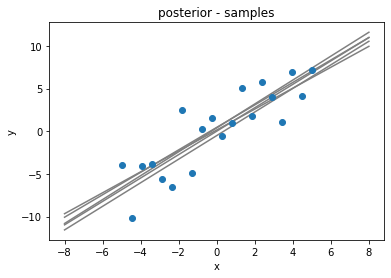

In [48]:
# Generate grid of new inputs x* for plotting
n = 100  # number of grid-points
xs = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws = stats.multivariate_normal(mean=mN, cov=SN, allow_singular=True).rvs(samples, random_state=seed)

# Compute corresponding values f(x*)
fs = Phi(xs) @ ws.T

# Plot the samples
plt.plot(xs, fs, 'gray') # samples
plt.scatter(x, y, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
print("ws:")    # ws is five random samples from the distribution p(w | y) = N(w; mN, SN)
print(ws)

ws:
[[-0.50564325  1.38213483]
 [ 0.45721401  1.31644379]
 [ 0.40025625  1.40106985]
 [ 0.14811795  1.22619342]
 [ 0.01189716  1.37245652]]


Next we plot samples from and credibility regions of the predictive distribution.

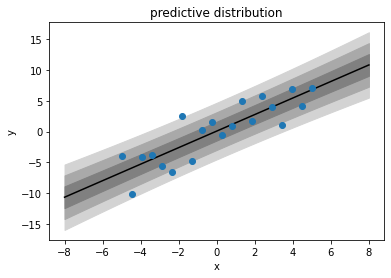

In [51]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar = Phi(xs) @ mN
Sstar = Phi(xs) @ SN @ Phi(xs).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred= np.sqrt(np.diag(Sstar))

# Plot credibility regions
plt.plot(xs, mstar, 'black') # predictive mean
plt.fill_between(xs, mstar + 3*stdpred, mstar - 3*stdpred, color='lightgray')
plt.fill_between(xs, mstar + 2*stdpred, mstar - 2*stdpred, color='darkgray')
plt.fill_between(xs, mstar + 1*stdpred, mstar - 1*stdpred, color='gray')
plt.scatter(x, y, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (a)

Go through the code and make sure that you can map the code to the model and regression method explained in Lecture 3.
Also run the code.
Make sure you understand the figures.

### (b)

Reduce the training data to only the first 5 data points in the training data.
What impact does this have on the predictive distribution?

In [52]:
x_red = x[:5]
y_red = y[:5]

SN_red = np.linalg.inv(np.linalg.inv(S0) + beta * Phi(x_red).T @ Phi(x_red))
mN_red = SN_red @ (np.linalg.inv(S0) @ m0 + beta * Phi(x_red).T @ y_red)

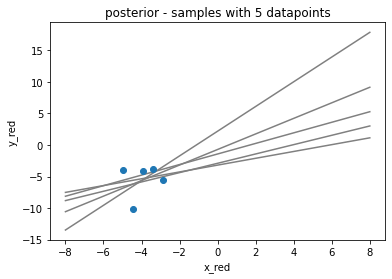

In [54]:
ws_red = stats.multivariate_normal(mean=mN_red, cov=SN_red, allow_singular=True).rvs(samples, random_state=seed)

# Compute corresponding values f(x*)
fs_red = Phi(xs) @ ws_red.T

# Plot the samples
plt.plot(xs, fs_red, 'gray') # samples
plt.scatter(x_red, y_red, zorder=3)
plt.title('posterior - samples with 5 datapoints')
plt.xlabel('x_red')
plt.ylabel('y_red')
plt.show()

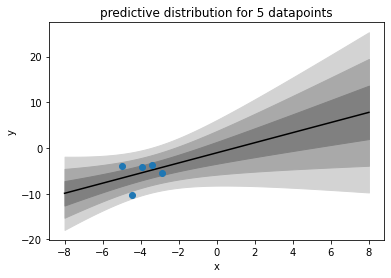

In [56]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar_red = Phi(xs) @ mN_red
Sstar_red = Phi(xs) @ SN_red @ Phi(xs).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred_red= np.sqrt(np.diag(Sstar_red))

# Plot credibility regions
plt.plot(xs, mstar_red, 'black') # predictive mean
plt.fill_between(xs, mstar_red + 3*stdpred_red, mstar_red - 3*stdpred_red, color='lightgray')
plt.fill_between(xs, mstar_red + 2*stdpred_red, mstar_red - 2*stdpred_red, color='darkgray')
plt.fill_between(xs, mstar_red + 1*stdpred_red, mstar_red - 1*stdpred_red, color='gray')
plt.scatter(x_red, y_red, zorder=3)
plt.title('predictive distribution for 5 datapoints')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercise 3.2: Feature vectors

### (a)

Load `nlindata.mat` instead of `lindata.mat` and run the code for this data.
Use all data, not only the first five data points as in Exercise 3.1 (b).
Do you think the model performs well on this data?

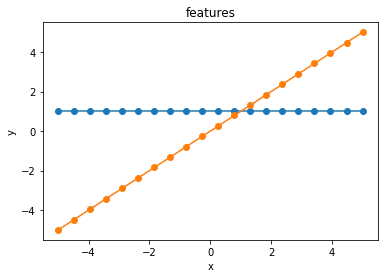

In [60]:
# Load data from disk
# File should be in the same folder as the Jupyter notebook,
# otherwise you have to adjust the path
data = spio.loadmat("nlindata.mat")
x = data["X"].flatten() # inputs
y = data["Y"].flatten() # outputs
beta = float(data["sigma"])**(-2) # measurement noise precision
N = x.size

# Define the feature vector
def Phi(a):  # Phi(a) = [1, a]
    return np.power(np.reshape(a, (-1, 1)), range(2))

# Plot the features
plt.plot(x, Phi(x), '-o')
plt.title('features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [61]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D = Phi(0).size  # number of features
m0 = np.zeros(D)
S0 = 10*np.eye(D) / D

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
SN = np.linalg.inv(np.linalg.inv(S0) + beta * Phi(x).T @ Phi(x))
mN = SN @ (np.linalg.inv(S0) @ m0 + beta * Phi(x).T @ y)

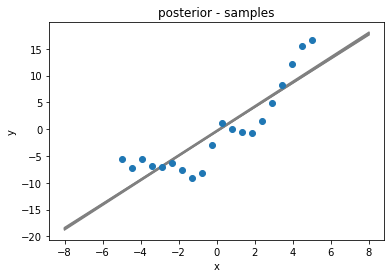

In [62]:
# Generate grid of new inputs x* for plotting
n = 100  # number of grid-points
xs = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws = stats.multivariate_normal(mean=mN, cov=SN, allow_singular=True).rvs(samples, random_state=seed)

# Compute corresponding values f(x*)
fs = Phi(xs) @ ws.T

# Plot the samples
plt.plot(xs, fs, 'gray') # samples
plt.scatter(x, y, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

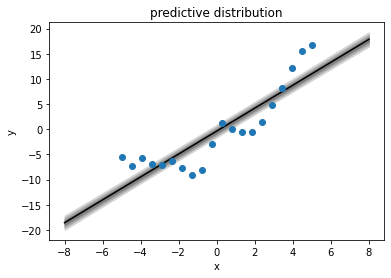

In [63]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar = Phi(xs) @ mN
Sstar = Phi(xs) @ SN @ Phi(xs).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred= np.sqrt(np.diag(Sstar))

# Plot credibility regions
plt.plot(xs, mstar, 'black') # predictive mean
plt.fill_between(xs, mstar + 3*stdpred, mstar - 3*stdpred, color='lightgray')
plt.fill_between(xs, mstar + 2*stdpred, mstar - 2*stdpred, color='darkgray')
plt.fill_between(xs, mstar + 1*stdpred, mstar - 1*stdpred, color='gray')
plt.scatter(x, y, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (b)

In order to improve the performance, consider instead a feature vector with an additional quadratic term

$$
\boldsymbol{\phi}(x)^{\mathsf{T}} = [1, x, x^2].
$$

Change the code accordingly and run it.

*Hint:* Only a very minor modification in the code is required to accommodate for this change.

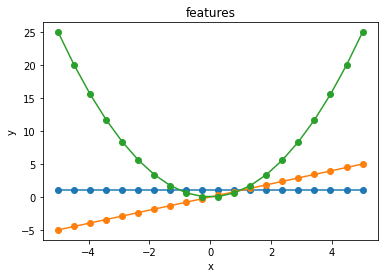

In [66]:
# Load data from disk
# File should be in the same folder as the Jupyter notebook,
# otherwise you have to adjust the path
data = spio.loadmat("nlindata.mat")
x = data["X"].flatten() # inputs
y = data["Y"].flatten() # outputs
beta = float(data["sigma"])**(-2) # measurement noise precision
N = x.size

# Define the feature vector
def Phi(a):  # Phi(a) = [1, a]
    return np.power(np.reshape(a, (-1, 1)), range(3))                     #### MADE SMALL CHANGE HERE

# Plot the features
plt.plot(x, Phi(x), '-o')
plt.title('features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [68]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D = Phi(0).size  # number of features
m0 = np.zeros(D)
S0 = 10*np.eye(D) / D

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
SN = np.linalg.inv(np.linalg.inv(S0) + beta * Phi(x).T @ Phi(x))
mN = SN @ (np.linalg.inv(S0) @ m0 + beta * Phi(x).T @ y)

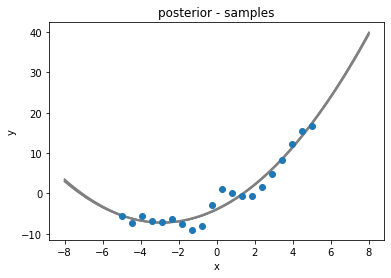

In [69]:
# Generate grid of new inputs x* for plotting
n = 100  # number of grid-points
xs = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws = stats.multivariate_normal(mean=mN, cov=SN, allow_singular=True).rvs(samples, random_state=seed)

# Compute corresponding values f(x*)
fs = Phi(xs) @ ws.T

# Plot the samples
plt.plot(xs, fs, 'gray') # samples
plt.scatter(x, y, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

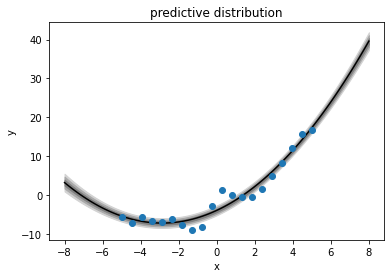

In [70]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar = Phi(xs) @ mN
Sstar = Phi(xs) @ SN @ Phi(xs).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred= np.sqrt(np.diag(Sstar))

# Plot credibility regions
plt.plot(xs, mstar, 'black') # predictive mean
plt.fill_between(xs, mstar + 3*stdpred, mstar - 3*stdpred, color='lightgray')
plt.fill_between(xs, mstar + 2*stdpred, mstar - 2*stdpred, color='darkgray')
plt.fill_between(xs, mstar + 1*stdpred, mstar - 1*stdpred, color='gray')
plt.scatter(x, y, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (c)

Use step functions

$$
h(x) = \begin{cases}
1, \qquad x \geq 0,\\
0, \qquad x < 0,
\end{cases}
$$

as features and change the code accordingly.
Place in total 9 of these features with two steps apart between $x = -8$ and $x = 8$.
The feature vector is then

$$
\boldsymbol{\phi}(x)^{\mathsf{T}} = [h(x-8), h(x - 6), \ldots, h(x + 8)].
$$

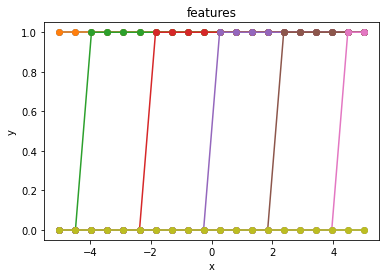

In [114]:
# Define the feature vector
def Phi_step(a):  # Phi(a) = [h(a-8), h(a-6), ... , h(a+8)]
    return (np.reshape(a, (-1,1)) > np.linspace(-8,8,9))    

# Plot the features
plt.plot(x, Phi_step(x), '-o')
plt.title('features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [115]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D = Phi_step(0).size  # number of features
m0 = np.zeros(D)
S0 = 10*np.eye(D) / D

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
SN = np.linalg.inv(np.linalg.inv(S0) + beta * Phi_step(x).T @ Phi_step(x))
mN = SN @ (np.linalg.inv(S0) @ m0 + beta * Phi_step(x).T @ y)

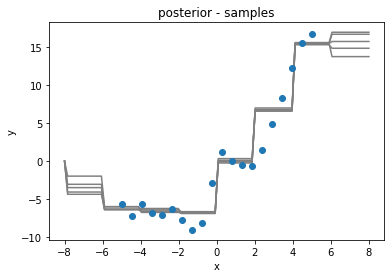

In [116]:
# Generate grid of new inputs x* for plotting
n = 100  # number of grid-points
xs = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws = stats.multivariate_normal(mean=mN, cov=SN, allow_singular=True).rvs(samples, random_state=seed)

# Compute corresponding values f(x*)
fs = Phi_step(xs) @ ws.T

# Plot the samples
plt.plot(xs, fs, 'gray') # samples
plt.scatter(x, y, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

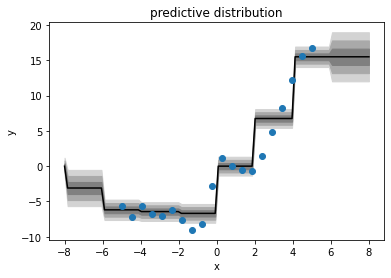

In [117]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar = Phi_step(xs) @ mN
Sstar = Phi_step(xs) @ SN @ Phi_step(xs).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred= np.sqrt(np.diag(Sstar))

# Plot credibility regions
plt.plot(xs, mstar, 'black') # predictive mean
plt.fill_between(xs, mstar + 3*stdpred, mstar - 3*stdpred, color='lightgray')
plt.fill_between(xs, mstar + 2*stdpred, mstar - 2*stdpred, color='darkgray')
plt.fill_between(xs, mstar + 1*stdpred, mstar - 1*stdpred, color='gray')
plt.scatter(x, y, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (d)

Can you come up with any other features that improve performance even further?

• Higher order polynomials should work

• Piecewise linear functions like on the solution sheets

## Exercise 3.3: Marginal likelihood

To get a quantitative measure of the performance of the proposed feature vectors, we want to compare them by computing the marginal likelihood $p(\mathbf{y})$ for each of the models.
Refer to Exercise 2.12(a) for the expression of the marginal likelihood of the Bayesian linear regression model.

### (a)

Extend the code to also compute the logarithm of the marginal likelihood.
Which one of the three feature vectors in Exercise 3.2 gives the largest log marginal likelihood on the data `nlindata.mat`?

In [132]:
def log_mar_lik(x,y,m0,S0,beta):
    """ Formula according to corollary 2"""
    N = x.shape[0]
    
    my = x@m0
    Sy = beta**(-1)*N + X@S0@X.t
    
    LML = np.log(stats.multivariate_normal(mean=my, cov=Sy, allow_singular=True))
    
    return LML
    

In [142]:
# Define the feature vector
def Phi(a):  # Phi(a) = [1, a]
    return np.power(np.reshape(a, (-1, 1)), range(2))

# Prior
D = Phi(0).size  # 0 is arbitrary
m0 = np.zeros(D)
S0 = 10*np.eye(D)/D

LML_linear = log_mar_lik(Phi_step(x),y,m0,S0,beta)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 9)

In [145]:
Phi(x)

array([[ 1.        , -5.        ],
       [ 1.        , -4.47368421],
       [ 1.        , -3.94736842],
       [ 1.        , -3.42105263],
       [ 1.        , -2.89473684],
       [ 1.        , -2.36842105],
       [ 1.        , -1.84210526],
       [ 1.        , -1.31578947],
       [ 1.        , -0.78947368],
       [ 1.        , -0.26315789],
       [ 1.        ,  0.26315789],
       [ 1.        ,  0.78947368],
       [ 1.        ,  1.31578947],
       [ 1.        ,  1.84210526],
       [ 1.        ,  2.36842105],
       [ 1.        ,  2.89473684],
       [ 1.        ,  3.42105263],
       [ 1.        ,  3.94736842],
       [ 1.        ,  4.47368421],
       [ 1.        ,  5.        ]])

In [146]:
m0

array([0., 0.])

In [133]:
# Define the feature vector
def Phi_step(a):  # Phi(a) = [h(a-8), h(a-6), ... , h(a+8)]
    return (np.reshape(a, (-1,1)) > np.linspace(-8,8,9))  

LML_step = log_mar_lik(Phi_step(x),y,m0,S0,beta)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 9)

### (b)

Perform the same comparison on the data `lindata.mat`.
What are your conclusions?

### (c)

Can you come up with any other feature vectors and/or values for prior/likelihood precisions that give an even larger log marginal likelihood?